In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [42]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [43]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

tiksi ru
fort nelson ca
ushuaia ar
vaini to
saldanha za
honningsvag no
bethel us
victoria sc
ushuaia ar
kapaa us
kapaa us
saleaula ws
bredasdorp za
nikolskoye ru
rikitea pf
sao joao da barra br
atuona pf
avarua ck
galiwinku au
los llanos de aridane es
husavik is
bacuit ph
castro cl
atuona pf
awbari ly
cherskiy ru
sukumo jp
rawson ar
raga sd
nanding cn
gulshat kz
nantucket us
cape town za
college us
cabedelo br
taolanaro mg
ratnagiri in
dikson ru
palmer us
kapaa us
mataura pf
necochea ar
bambanglipuro id
omsukchan ru
quatre cocos mu
rundu na
saint-philippe re
kiama au
bluff nz
tallahassee us
kazachka ru
beringovskiy ru
cherskiy ru
vaini to
hermanus za
los llanos de aridane es
rikitea pf
atuona pf
illoqqortoormiut gl
saint-augustin ca
qaanaaq gl
ribeira grande pt
kapaa us
attawapiskat ca
lokosovo ru
gornyy ru
saldanha za
tiksi ru
kavieng pg
kaitangata nz
mahebourg mu
mataura pf
chokurdakh ru
bredasdorp za
vaini to
ushuaia ar
buraydah sa
puerto ayora ec
illoqqortoormiut gl
cedar city us
l

san cristobal cu
ushuaia ar
albany au
attawapiskat ca
san pedro bo
tsihombe mg
ushuaia ar
goderich sl
cape town za
caravelas br
mataura pf
kahului us
severo-kurilsk ru
rikitea pf
mochudi bw
attawapiskat ca
trincomalee lk
ayan ru
ilulissat gl
hobyo so
busselton au
nizhneyansk ru
mizdah ly
aras no
wattegama lk
banda aceh id
leningradskiy ru
hobart au
hamilton bm
pevek ru
ambilobe mg
sentyabrskiy ru
lebu cl
hit iq
cape town za
qaanaaq gl
busselton au
busselton au
koumac nc
la asuncion ve
westport ie
torbay ca
vila franca do campo pt
belushya guba ru
salalah om
lavrentiya ru
lebu cl
tura ru
la romana do
flin flon ca
longyearbyen sj
mari-turek ru
piacabucu br
cape town za
cape town za
hasaki jp
busselton au
rikitea pf
umaria in
osoyoos ca
primore ru
georgetown sh
nosy varika mg
mahebourg mu
artyom az
butaritari ki
castro cl
cape town za
padang id
talara pe
grand river south east mu
russell nz
vardo no
clyde river ca
saskylakh ru
pevek ru
saint george bm
rikitea pf
padang id
le mars us
port 

mar del plata ar
severo-kurilsk ru
tashtagol ru
tuktoyaktuk ca
hilo us
karpathos gr
qaanaaq gl
rikitea pf
bull savanna jm
bathsheba bb
rikitea pf
saskylakh ru
victoria sc
tiksi ru
kamenka ru
jos ng
hervey bay au
kapaa us
aklavik ca
punta arenas cl
sitka us
fortuna us
avera pf
rikitea pf
pisco pe
saint-philippe re
namatanai pg
san isidro ph
waddan ly
rikitea pf
bosaso so
fortuna us
grand river south east mu
honiara sb
kaitangata nz
havelock us
rocha uy
tuktoyaktuk ca
hobart au
juazeiro br
thompson ca
hobart au
port-gentil ga
russell nz
nabire id
saleaula ws
butaritari ki
wichita falls us
ilulissat gl
mataura pf
punta arenas cl
yellowknife ca
tuktoyaktuk ca
nizhneyansk ru
clyde river ca
fort madison us
rikitea pf
nome us
calvinia za


In [44]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [45]:
# Import the requests library.
import requests

# IMport the API key
from config import weather_api_key


In [46]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=995296a166e2a2d479dc0ff13f817281


In [47]:
# Import the datetime module from the datetime library
from datetime import datetime

In [48]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning fo the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [49]:
c = cities[:10]
c

['tiksi',
 'fort nelson',
 'ushuaia',
 'vaini',
 'saldanha',
 'honningsvag',
 'bethel',
 'victoria',
 'kapaa',
 'saleaula']

In [50]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -43.34, 'lat': -3.74},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 83.46,
  'feels_like': 93.22,
  'temp_min': 83.46,
  'temp_max': 83.46,
  'pressure': 1011,
  'humidity': 77,
  'sea_level': 1011,
  'grnd_level': 999},
 'wind': {'speed': 1.57, 'deg': 8},
 'rain': {'3h': 4.87},
 'clouds': {'all': 92},
 'dt': 1587234257,
 'sys': {'country': 'BR', 'sunrise': 1587199915, 'sunset': 1587243171},
 'timezone': -10800,
 'id': 3409644,
 'name': 'Corrente',
 'cod': 200}

In [12]:
# Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for loggin purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + "i"

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | bredasdorp
Processing Record 2 of Set 12 | melita
Processing Record 3 of Set 12 | nikolskoye
Processing Record 4 of Set 12 | bad krozingen
Processing Record 5 of Set 12 | tymovskoye
Processing Record 6 of Set 12 | praya
Processing Record 7 of Set 12 | vaini
Processing Record 8 of Set 12 | tuktoyaktuk
Processing Record 9 of Set 12 | wollongong
Processing Record 10 of Set 12 | port alfred
Processing Record 11 of Set 12 | muros
Processing Record 12 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 12 | conde
Processing Record 14 of Set 12 | hobart
Processing Record 15 of Set 12 | busselton
Processing Record 16 of Set 12 | gwembe
Processing Record 17 of Set 12 | mataura
Processing Record 18 of Set 12 | hilo
Processing Record 19 of Set 12 | albany
Processing Record 20 of Set 12 | comodoro rivadavia
Processing Record 21 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 22 of Set 12 | kodiak
Processing Record 23 of

Processing Record 36 of Set 15 | mao
Processing Record 37 of Set 15 | alindao
Processing Record 38 of Set 15 | novopokrovka
Processing Record 39 of Set 15 | teknaf
Processing Record 40 of Set 15 | akyab
Processing Record 41 of Set 15 | sao filipe
Processing Record 42 of Set 15 | doha
Processing Record 43 of Set 15 | hovd
Processing Record 44 of Set 15 | faanui
Processing Record 45 of Set 15 | maridi
Processing Record 46 of Set 15 | fairhope
Processing Record 47 of Set 15 | ukiah
Processing Record 48 of Set 15 | viligili
City not found. Skipping...
Processing Record 49 of Set 15 | derzhavinsk
Processing Record 50 of Set 15 | tasiilaq
Processing Record 1 of Set 16 | verkhnevilyuysk
Processing Record 2 of Set 16 | talara
Processing Record 3 of Set 16 | rio tercero
Processing Record 4 of Set 16 | longyearbyen
Processing Record 5 of Set 16 | poum
Processing Record 6 of Set 16 | saleaula
City not found. Skipping...
Processing Record 7 of Set 16 | port augusta
Processing Record 8 of Set 16 | 

Processing Record 20 of Set 19 | alto araguaia
Processing Record 21 of Set 19 | port-gentil
Processing Record 22 of Set 19 | wahran
City not found. Skipping...
Processing Record 23 of Set 19 | ambilobe
Processing Record 24 of Set 19 | alta floresta
Processing Record 25 of Set 19 | wonthaggi
Processing Record 26 of Set 19 | severo-yeniseyskiy
Processing Record 27 of Set 19 | vanavara
Processing Record 28 of Set 19 | bariri
Processing Record 29 of Set 19 | karasjok
Processing Record 30 of Set 19 | portland
Processing Record 31 of Set 19 | monteagudo
Processing Record 32 of Set 19 | kaitangata
Processing Record 33 of Set 19 | charlestown
Processing Record 34 of Set 19 | noumea
Processing Record 35 of Set 19 | iquitos
Processing Record 36 of Set 19 | melito di porto salvo
Processing Record 37 of Set 19 | tucurui
Processing Record 38 of Set 19 | kavaratti
Processing Record 39 of Set 19 | talwandi bhai
Processing Record 40 of Set 19 | damaturu
Processing Record 41 of Set 19 | kovdor
Processi

City not found. Skipping...
Processing Record 4 of Set 23 | kachikau
City not found. Skipping...
Processing Record 5 of Set 23 | kampala
Processing Record 6 of Set 23 | warqla
City not found. Skipping...
Processing Record 7 of Set 23 | los llanos de aridane
Processing Record 8 of Set 23 | pangody
Processing Record 9 of Set 23 | bonavista
Processing Record 10 of Set 23 | nobres
Processing Record 11 of Set 23 | prince rupert
Processing Record 12 of Set 23 | lerwick
Processing Record 13 of Set 23 | marinette
Processing Record 14 of Set 23 | solnechnogorsk
Processing Record 15 of Set 23 | flinders
Processing Record 16 of Set 23 | souillac
Processing Record 17 of Set 23 | guerrero negro
Processing Record 18 of Set 23 | thinadhoo
Processing Record 19 of Set 23 | gravdal
Processing Record 20 of Set 23 | bengkulu
Processing Record 21 of Set 23 | atakpame
Processing Record 22 of Set 23 | gairatganj
Processing Record 23 of Set 23 | camacha
Processing Record 24 of Set 23 | bone
Processing Record 

In [14]:
len(cities)

590

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,68.00,60,0,6.93,ZA,2020-04-18 16:51:31
1,Melita,49.27,-101.00,48.00,60,94,20.00,CA,2020-04-18 16:54:31
2,Nikolskoye,59.70,30.79,37.40,86,90,15.66,RU,2020-04-18 16:51:25
3,Bad Krozingen,47.92,7.70,73.99,46,53,3.00,DE,2020-04-18 16:54:31
4,Tymovskoye,50.85,142.66,28.06,95,99,3.49,RU,2020-04-18 16:54:31
5,Praya,14.92,-23.51,80.60,51,20,20.80,CV,2020-04-18 16:51:50
6,Vaini,-21.20,-175.20,77.00,83,75,8.05,TO,2020-04-18 16:50:59
7,Tuktoyaktuk,69.45,-133.04,5.00,84,75,10.29,CA,2020-04-18 16:51:18
8,Wollongong,-34.43,150.88,55.00,89,91,6.49,AU,2020-04-18 16:54:32
9,Port Alfred,-33.59,26.89,69.01,93,0,1.01,ZA,2020-04-18 16:51:08


In [16]:
# Change the column header orders
new_column_order = ["City", 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2020-04-18 16:51:31,-34.53,20.04,68.00,60,0,6.93
1,Melita,CA,2020-04-18 16:54:31,49.27,-101.00,48.00,60,94,20.00
2,Nikolskoye,RU,2020-04-18 16:51:25,59.70,30.79,37.40,86,90,15.66
3,Bad Krozingen,DE,2020-04-18 16:54:31,47.92,7.70,73.99,46,53,3.00
4,Tymovskoye,RU,2020-04-18 16:54:31,50.85,142.66,28.06,95,99,3.49


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevent fields from the datafrome pr plotting
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
import time

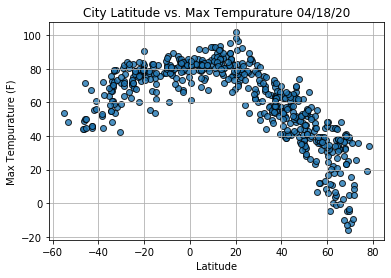

In [20]:
# Build the scatter plot for latitude vs. max tempurature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs. Max Tempurature " + time.strftime("%x"))
plt.ylabel("Max Tempurature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

# show the plot.
plt.show()

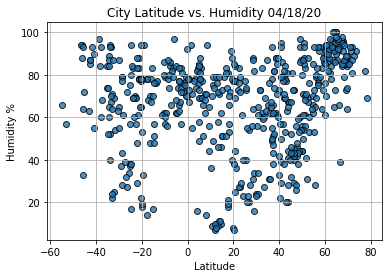

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig2.png")

# show the plot.
plt.show()

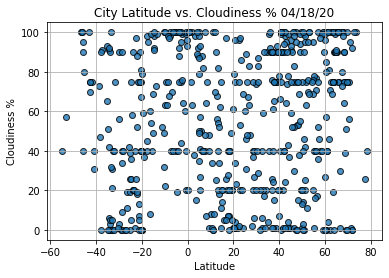

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs. Cloudiness % " + time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig3.png")

# show the plot.
plt.show()

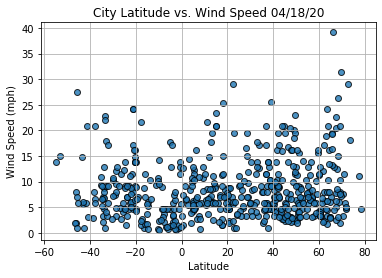

In [23]:
# Build the scatter plots for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph proterties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig4.png")

# show the plot.
plt.show()

In [24]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [25]:

# Perform linear regression.
#(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept. 
#regress_values = x_values * slope + intercept

# Get the equation of the line.
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
#plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
#plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
#plt.annotate(line_eq, (10,40), fontsize=15, color="red")
#plt.xlabel('Latitude')
#plt.ylabel('Temp')
#plt.show()

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2020-04-18 16:51:06
Lat                        -33.65
Lng                        115.33
Max Temp                       61
Humidity                       67
Cloudiness                    100
Wind Speed                  22.86
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Melita,CA,2020-04-18 16:54:31,49.27,-101.00,48.00,60,94,20.00
2,Nikolskoye,RU,2020-04-18 16:51:25,59.70,30.79,37.40,86,90,15.66
3,Bad Krozingen,DE,2020-04-18 16:54:31,47.92,7.70,73.99,46,53,3.00
4,Tymovskoye,RU,2020-04-18 16:54:31,50.85,142.66,28.06,95,99,3.49
5,Praya,CV,2020-04-18 16:51:50,14.92,-23.51,80.60,51,20,20.80
...,...,...,...,...,...,...,...,...,...
529,Minuri,PH,2020-04-18 16:56:34,16.54,121.86,73.90,81,97,2.17
530,Sa Kaeo,TH,2020-04-18 16:56:34,13.81,102.07,80.10,79,52,2.39
534,Nakusp,CA,2020-04-18 16:56:35,50.25,-117.80,46.65,61,100,1.99
535,Clarksburg,US,2020-04-18 16:56:35,39.28,-80.34,41.00,60,90,9.17


In [29]:
# Create Norther and Southern Hemishpere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

In [30]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Melita,CA,2020-04-18 16:54:31,49.27,-101.00,48.00,60,94,20.00
2,Nikolskoye,RU,2020-04-18 16:51:25,59.70,30.79,37.40,86,90,15.66
3,Bad Krozingen,DE,2020-04-18 16:54:31,47.92,7.70,73.99,46,53,3.00
4,Tymovskoye,RU,2020-04-18 16:54:31,50.85,142.66,28.06,95,99,3.49
5,Praya,CV,2020-04-18 16:51:50,14.92,-23.51,80.60,51,20,20.80


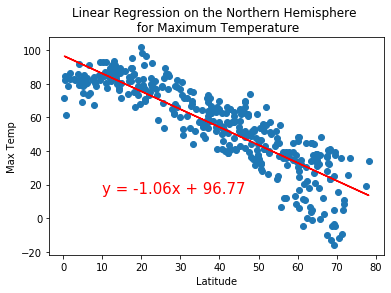

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,15))

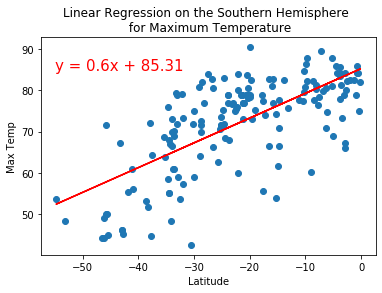

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,85))

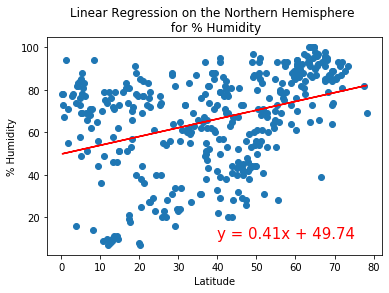

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

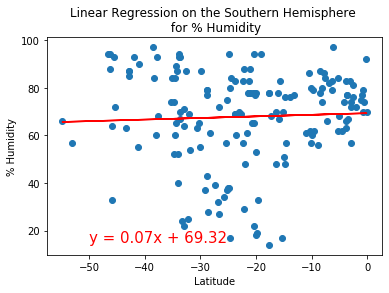

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

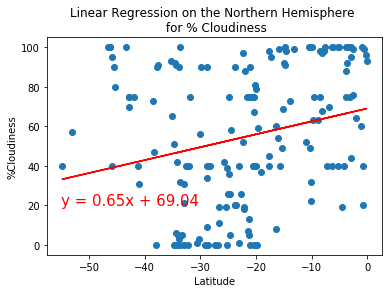

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '%Cloudiness',(-55,20))

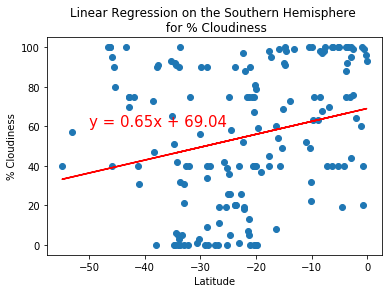

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

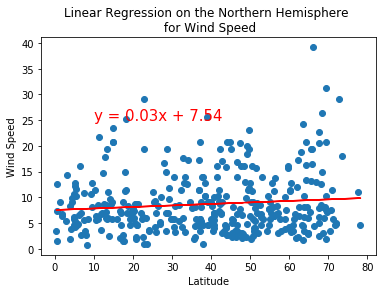

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

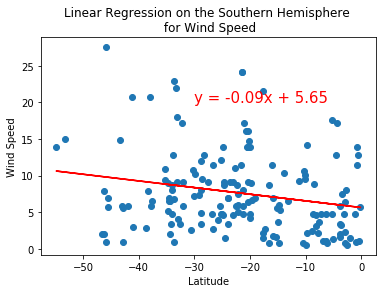

In [38]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,20))